In [2]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
global_path = glob('train/patient*/study*/*.jpg')
print(f'Количество наблюдений : {len(global_path)}')

Количество наблюдений : 223414


In [4]:
train_df = pd.read_csv('train.csv')
print(f'Размер набора данных для обучения : {train_df.shape}')
train_df.head(6)

Размер набора данных для обучения : (223414, 19)


,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
5,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Frontal,PA,1.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [5]:
def count_diseases(diseases, train_df):
    diseases_counter = np.zeros(len(diseases))
    for index, rows in train_df.iterrows():
        for disease in diseases:
            if rows[disease] == 1 and rows['Frontal/Lateral'] == 'Frontal':
                diseases_counter[diseases.index(disease)] += 1
    return diseases_counter

In [6]:
diseases = ['Lung Opacity', 'Edema', 'Pneumonia', 'Cardiomegaly', 'Fracture']
diseases_count = count_diseases(diseases, train_df)

In [7]:
diseases_dict = {}
for index, disease in enumerate(diseases):
    diseases_dict[disease] = diseases_count[index]

In [8]:
diseases_dict = dict(sorted(diseases_dict.items(), key=lambda item: item[1]))
print(diseases_dict)

{'Pneumonia': 4675.0, 'Fracture': 7436.0, 'Cardiomegaly': 23385.0, 'Edema': 49675.0, 'Lung Opacity': 94211.0}


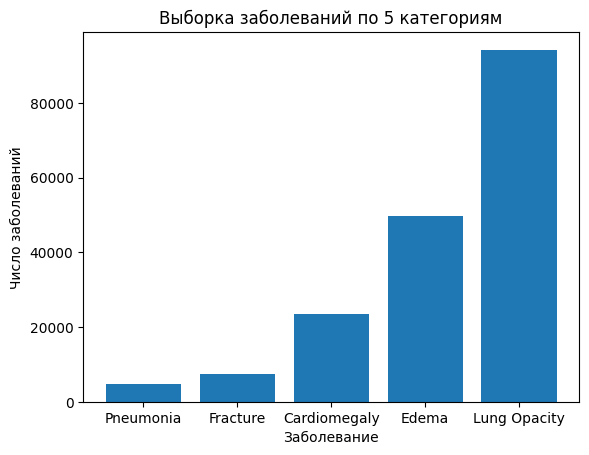

In [9]:
names = list(diseases_dict.keys())
values = list(diseases_dict.values())
plt.bar(range(len(diseases_dict)), values, tick_label=names)
plt.xlabel('Заболевание')
plt.ylabel('Число заболеваний')
plt.title('Выборка заболеваний по 5 категориям')
plt.show()